In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

####Importing the Dataset

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

###To Display the first 10 records of the dataset

In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<b>To check the NULL values in the columns

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###To check the columns names

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

###Here we are checking the total number of "Yes" and "NO" in the last column (Decision Column)

In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

##To check the shape of the last column


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###To check the Unique Values in the columns

In [ ]:
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


##Here we have generated the heatmap for the columns in the numerical form

<ipython-input-20-9dcccf564214>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, ax=ax)


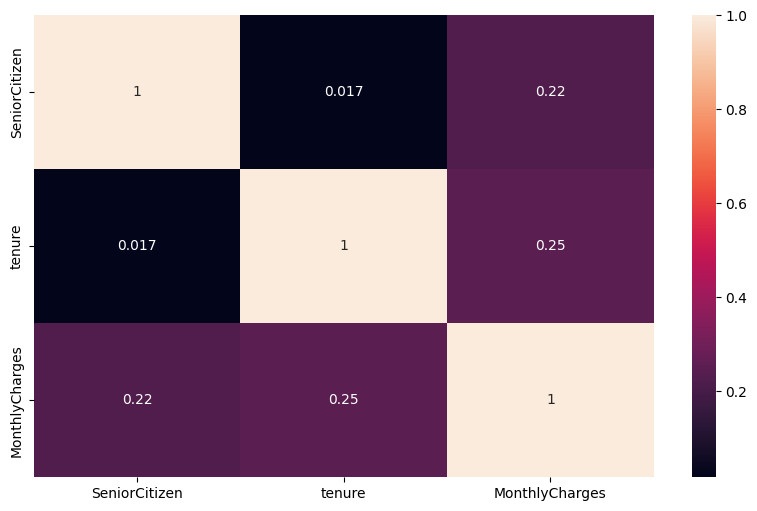

In [ ]:
import matplotlib.pyplot as plt
from numpy.ma.core import common_fill_value
fig = plt.figure(figsize = (10,6))
ax = fig.gca()
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()


In [3]:
# Dropping customerid columns as it is highly cardinal
df.drop("customerID",axis=1,inplace=True)

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### univariant graph for the comparison of Gender between male and female

Text(0.5, 1.0, 'gender')

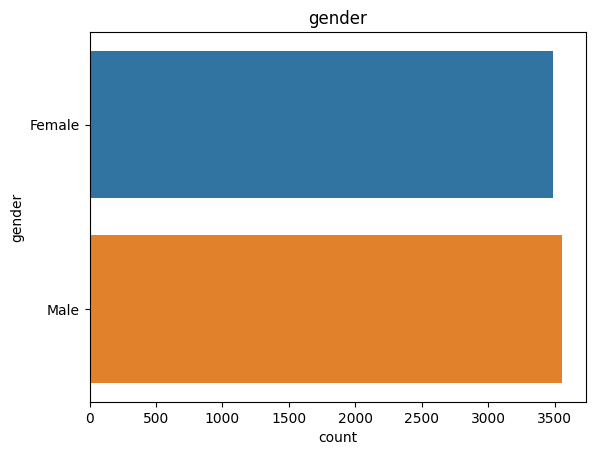

In [ ]:
sns.countplot(y='gender', data=df)
plt.title('gender')

### univariant graph for the comparison of SeniorCitizen

Text(0.5, 1.0, 'SeniorCitizen')

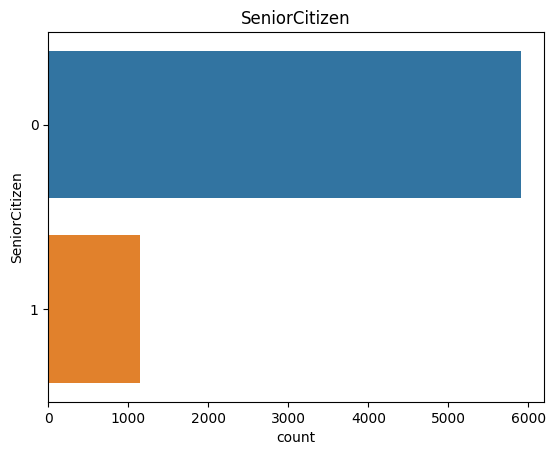

In [ ]:
sns.countplot(y='SeniorCitizen', data=df)
plt.title('SeniorCitizen')

### univariant graph for the comparison of contract

Text(0.5, 1.0, 'Contract')

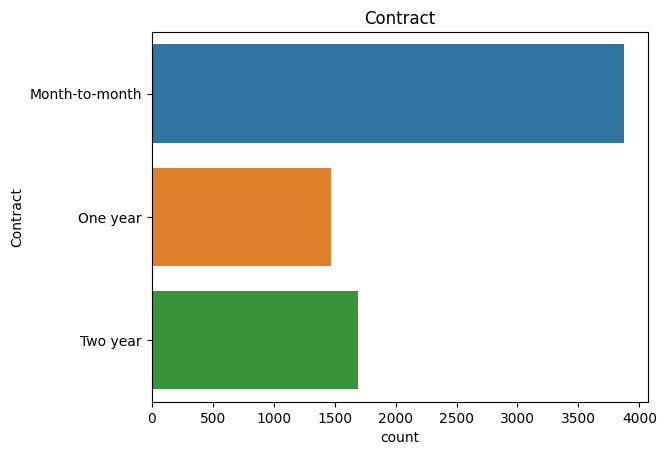

In [ ]:
sns.countplot(y='Contract', data=df)
plt.title('Contract')

### univariant graph for the comparison of Payment Method

Text(0.5, 1.0, 'PaymentMethod')

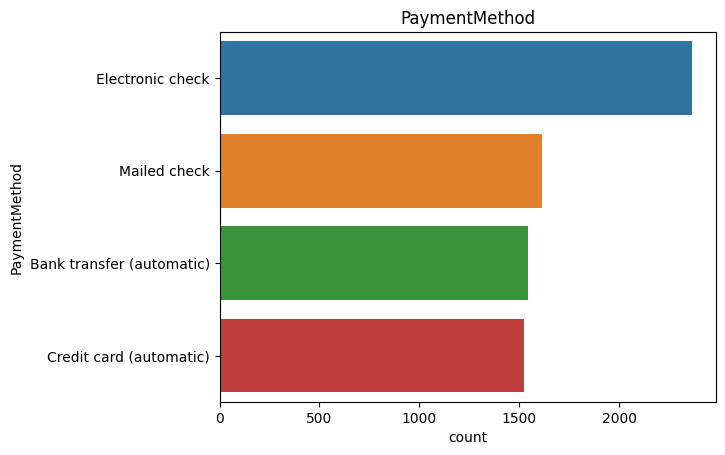

In [ ]:
sns.countplot(y='PaymentMethod', data=df)
plt.title('PaymentMethod')


Text(0, 0.5, 'Churn')

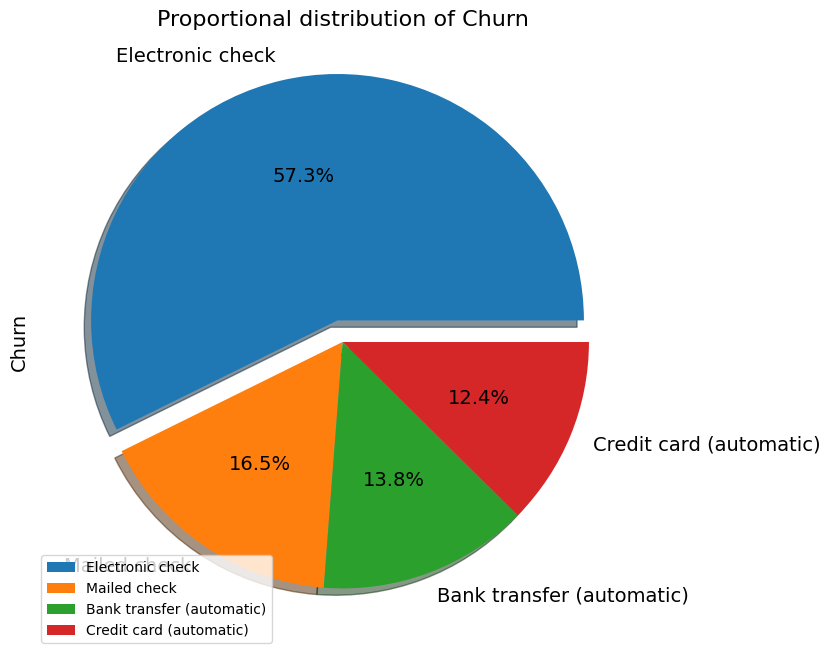

In [5]:
# Plotting the distribution of Paymenymethod where people churned
df[df['Churn']=='Yes']['PaymentMethod'].value_counts().plot(kind='pie',explode=[0.09,0,0,0],legend=True,autopct="%3.1f%%", shadow=True, figsize=(8,8),fontsize=14)
plt.title('Proportional distribution of Churn', fontsize=16)
plt.ylabel('Churn',fontsize=14)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [ ]:
df.shape

(7043, 20)

In [ ]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,2609,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,2646,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3022,0


##### to check the Variance for the numerical columns

In [ ]:
# Get the numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Calculate the variance of numeric columns
variance = df[numeric_columns].var()

print(variance)

gender              2.500129e-01
SeniorCitizen       1.358745e-01
Partner             2.497476e-01
Dependents          2.098649e-01
tenure              6.031681e+02
PhoneService        8.746938e-02
MultipleLines       8.997548e-01
InternetService     5.443434e-01
OnlineSecurity      7.393377e-01
OnlineBackup        7.746860e-01
DeviceProtection    7.743100e-01
TechSupport         7.422694e-01
StreamingTV         7.832283e-01
StreamingMovies     7.833856e-01
Contract            6.951478e-01
PaperlessBilling    2.415299e-01
PaymentMethod       1.140846e+00
MonthlyCharges      9.054109e+02
TotalCharges        3.567163e+06
Churn               1.949764e-01
dtype: float64


###Here we are checking the column "tenure" where its value is 0

In [4]:
# Data where tenure equals 0
df[df["tenure"]==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


<Figure size 2000x800 with 0 Axes>

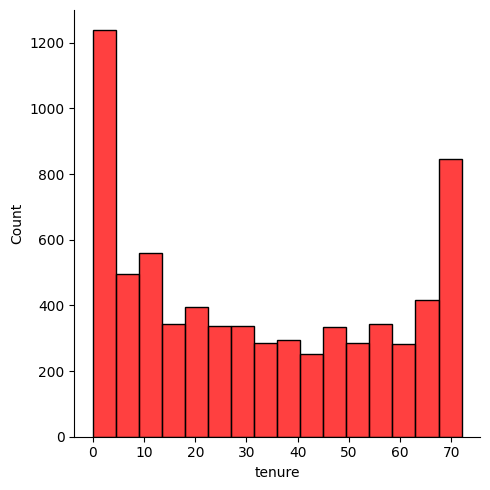

In [7]:
# Plotting tenure column with count
plt.figure(figsize=(20, 8))
sns.displot(df.tenure, color='red')
plt.show()

###With the help of this command we have replaced 0 with the values by taking the mean of the column

In [5]:
# Replace tenure 0 with mean since there are no extreme values
df['tenure']=df['tenure'].replace(0,df['tenure'].mean())

In [9]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62.0,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


###Label encoding is applied on all the object columns to convert the categorical values to Numerical values

In [6]:
#selecting colmns with the object datatype
cols= df.select_dtypes(include=object).columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cols:
  df[i]=le.fit_transform(df[i])

In [11]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24.0,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72.0,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11.0,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4.0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


###HeatMap of all the columns for the correlations

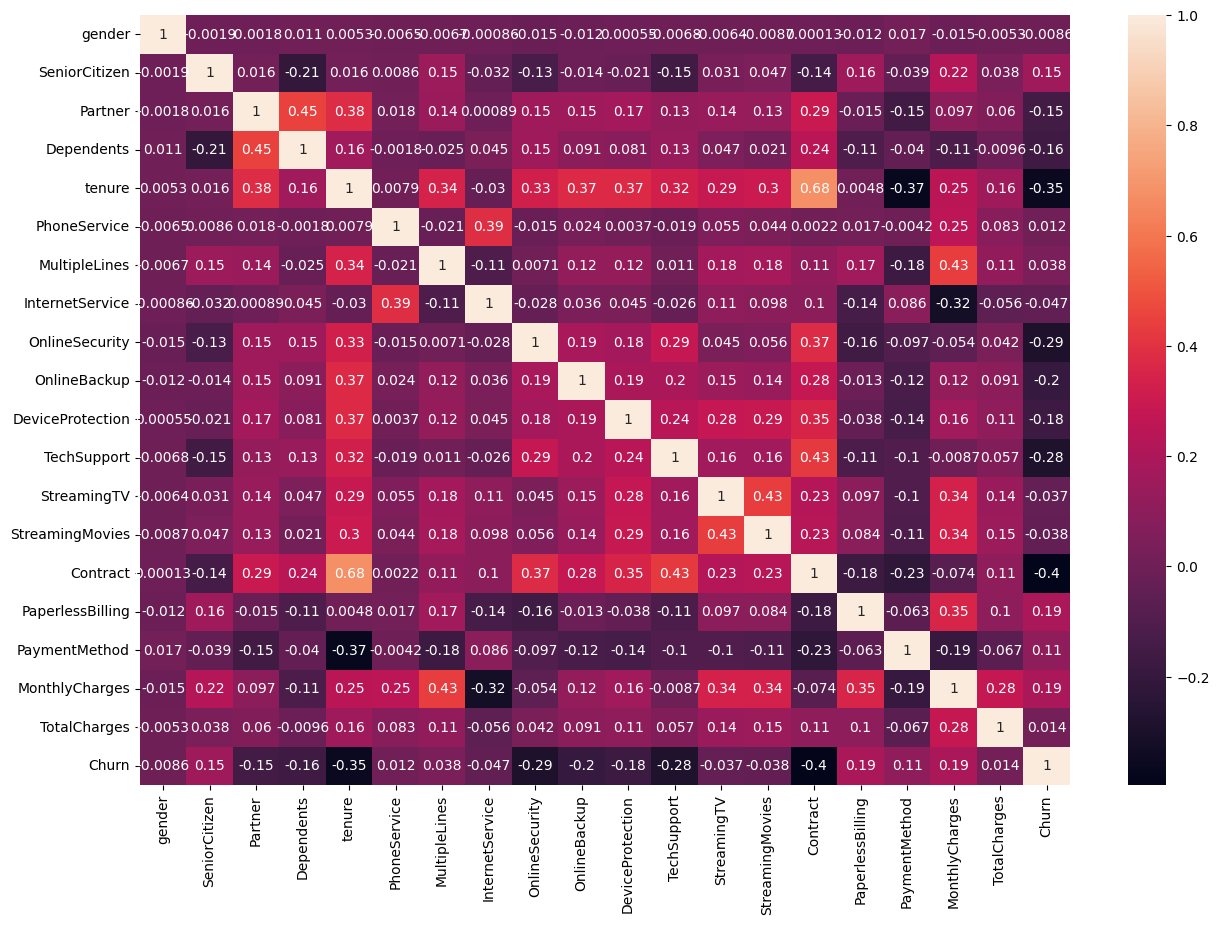

In [ ]:
import matplotlib.pyplot as plt
from numpy.ma.core import common_fill_value
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

#### Separating the feature variables into 'X' by excluding the 'Churn' column, and assigns the target variable 'y' as the 'Churn' column

In [7]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [8]:
X.shape

(7043, 19)

In [9]:
y.shape

(7043,)

###Split into Training & Testing

In [10]:
from sklearn.model_selection import train_test_split
# Splitting data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

###Applying the "Smote" technique to balance the dataset

In [11]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming you have your feature matrix X and target vector y
# X: Features, y: Target variable

# Instantiate the SMOTE class
smote = SMOTE()

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify the balanced class distribution
print(pd.Series(y_resampled).value_counts())

0    5174
1    5174
Name: Churn, dtype: int64


In [12]:
X=X_resampled

In [13]:
y=y_resampled

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

###Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.8024154589371981

###Random Forest classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8429951690821256

###SVM

In [17]:
#For SVM
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.7855072463768116

<b> Hyper Parameter Tunning

In [18]:
param_grid=[{'n_estimators':[100,200,300],'max_depth':[None,2,3,10,20],'max_features':['sqrt',2,4,8,16,'log2', None]}]

In [19]:
temp_rf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_search=GridSearchCV(estimator=temp_rf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

In [20]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'max_depth': [None, 2, 3, 10, 20],
                          'max_features': ['sqrt', 2, 4, 8, 16, 'log2', None],
                          'n_estimators': [100, 200, 300]}],
             scoring='roc_auc')

In [ ]:
grid_search.best_score_

0.9272329657989161

In [ ]:
grid_search.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}

In [ ]:
#creating the final random forest model from the grid seach's best estimator
final_rf=grid_search.best_estimator_

In [ ]:
#fitting the final model with training set
final_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=300, n_jobs=-1,
                       random_state=0)

In [ ]:
#making prediction on the train dataset
y_train_pred=final_rf.predict(X_train)

In [ ]:
#making prediction on the test set
y_test_pred=final_rf.predict(X_test)

####Model Evalutaion

##Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
#confusion Matrix for y_test and y_test_pred

confusion_mat=pd.DataFrame(confusion_matrix(y_test,y_test_pred))

In [ ]:
confusion_mat.index=['Actual Negative', 'Actual Positive']
confusion_mat.columns=['predicted Negative','predictive Positive']
confusion_mat

,predicted Negative,predictive Positive
Actual Negative,891,175
Actual Positive,140,864


###Accuracy

In [ ]:

#accuracy score on the test set
print("Accuracy score for the test data is:", accuracy_score(y_test,y_test_pred))

Accuracy score for the test data is: 0.8478260869565217


#Precision

In [ ]:
#Precision score on the training set

print('Accuracy score for the train data is:', precision_score(y_train,y_train_pred))

Accuracy score for the train dataset is: 0.9911967642160362


In [ ]:
#Precision score on the test set

print('Accuracy score for the test data is:', precision_score(y_test,y_test_pred))

Accuracy score for the train dataset is: 0.8315688161693936


##Recall

In [ ]:
#Recall score on the training set
print('Accuracy score for the train data is:', recall_score(y_train,y_train_pred))

Accuracy score for the train dataset is: 0.9990407673860912


In [ ]:
#recall score on the test set
print('Accuracy score for the test data is:', recall_score(y_test,y_test_pred))

Accuracy score for the test data is: 0.8605577689243028


F1-Score

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

print('F1 score for the test data is:', f1)
print('Confusion matrix:')
print(cm)